In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use("seaborn")
import plotly.graph_objects as go
from plotly.subplots import make_subplots


C:\Users\Kamir\AppData\Local\Temp\ipykernel_9040\324813220.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
data = pd.read_csv("immobilier_france.csv")

In [4]:
departement = data[data["ville"]=="BREST"]

# Data processing 


In [5]:
departement.shape


(24662, 23)

In [6]:
departement.isnull().sum()


Unnamed: 0                    0
id_transaction                0
date_transaction              0
prix                          0
departement                   0
id_ville                      0
ville                         0
code_postal                   0
adresse                       0
type_batiment                 0
vefa                          0
n_pieces                      0
surface_habitable             0
id_parcelle_cadastre          0
latitude                      0
longitude                     0
surface_dependances           0
surface_locaux_industriels    0
surface_terrains_agricoles    0
surface_terrains_sols         0
surface_terrains_nature       0
surface_totale                0
prix_m2                       0
dtype: int64

In [7]:
departement.dtypes


Unnamed: 0                      int64
id_transaction                  int64
date_transaction               object
prix                          float64
departement                     int64
id_ville                        int64
ville                          object
code_postal                     int64
adresse                        object
type_batiment                  object
vefa                             bool
n_pieces                        int64
surface_habitable               int64
id_parcelle_cadastre           object
latitude                      float64
longitude                     float64
surface_dependances           float64
surface_locaux_industriels    float64
surface_terrains_agricoles    float64
surface_terrains_sols         float64
surface_terrains_nature       float64
surface_totale                float64
prix_m2                       float64
dtype: object

In [517]:
departement['surface_locaux_industriels'] = departement['surface_locaux_industriels'].str.replace(r'{|}', '')
departement['surface_locaux_industriels'] = departement['surface_locaux_industriels'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_locaux_industriels'] = pd.to_numeric(departement['surface_locaux_industriels'], errors='coerce')
departement['surface_locaux_industriels'] = departement['surface_locaux_industriels'].fillna(0)
departement['surface_dependances'] = departement['surface_dependances'].str.replace(r'{|}', '')
departement['surface_dependances'] = departement['surface_dependances'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_dependances'] = pd.to_numeric(departement['surface_dependances'], errors='coerce')
departement['surface_dependances'] = departement['surface_dependances'].fillna(0)
departement['surface_terrains_agricoles'] = departement['surface_terrains_agricoles'].str.replace(r'{|}', '')
departement['surface_terrains_agricoles'] = departement['surface_terrains_agricoles'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_terrains_agricoles'] = pd.to_numeric(departement['surface_terrains_agricoles'], errors='coerce')
departement['surface_terrains_agricoles'] = departement['surface_terrains_agricoles'].fillna(0)
departement['surface_terrains_sols'] = departement['surface_terrains_sols'].str.replace(r'{|}', '')
departement['surface_terrains_sols'] = departement['surface_terrains_sols'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_terrains_sols'] = pd.to_numeric(departement['surface_terrains_sols'], errors='coerce')
departement['surface_terrains_sols'] = departement['surface_terrains_sols'].fillna(0)
departement['surface_terrains_nature'] = departement['surface_terrains_nature'].str.replace(r'{|}', '')
departement['surface_terrains_nature'] = departement['surface_terrains_nature'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_terrains_nature'] = pd.to_numeric(departement['surface_terrains_nature'], errors='coerce')
departement['surface_terrains_nature'] = departement['surface_terrains_nature'].fillna(0)


C:\Users\Kamir\AppData\Local\Temp\ipykernel_10512\2633795302.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Kamir\AppData\Local\Temp\ipykernel_10512\2633795302.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kamir\AppData\Local\Temp\ipykernel_10512\2633795302.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kamir\AppData\Local\Temp\ipykernel_10512\2633795302.py:3: SettingWithCopyWarning:


A value is trying to be set on

In [101]:
departement["surface_totale"]=departement["surface_habitable"]+departement["surface_locaux_industriels"]+departement["surface_dependances"]+departement["surface_terrains_agricoles"]+departement["surface_terrains_sols"]+departement["surface_terrains_nature"]

C:\Users\Kamir\AppData\Local\Temp\ipykernel_19652\3671938087.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
departement.nunique()


Unnamed: 0                    24662
id_transaction                24662
date_transaction               2592
prix                           4312
departement                       1
id_ville                          1
ville                             1
code_postal                       2
adresse                        9384
type_batiment                     2
vefa                              2
n_pieces                         14
surface_habitable               246
id_parcelle_cadastre           7935
latitude                       7934
longitude                      7934
surface_dependances               2
surface_locaux_industriels      105
surface_terrains_agricoles       42
surface_terrains_sols           937
surface_terrains_nature           9
surface_totale                 1080
prix_m2                       13768
dtype: int64

In [9]:
print(departement['surface_habitable'].value_counts(),'\n', departement['n_pieces'].value_counts(),'\n', departement['code_postal'].value_counts(),'\n', departement['type_batiment'].value_counts())


80     556
63     546
62     516
68     510
64     495
      ... 
225      1
277      1
238      1
212      1
350      1
Name: surface_habitable, Length: 246, dtype: int64 
 4     6583
3     6033
2     4147
5     3580
1     2503
6     1207
7      377
8      105
0       67
9       40
10      12
12       3
11       3
13       2
Name: n_pieces, dtype: int64 
 29200    24651
29000       11
Name: code_postal, dtype: int64 
 Appartement    18681
Maison          5981
Name: type_batiment, dtype: int64


In [ ]:
#from shapely.geometry import Point, Polygon

# Coordonnées de l'adresse
#adresse_coord = Point(48.131687, -1.692182)  # Exemple de coordonnées de Paris, France

# Définir les coordonnées du quartier lambda sous forme de polygone (exemple)
#quartier_lambda = Polygon([(-1.691197797465471, 48.133352271301035), (48.86, 2.35), (48.86, 2.36), (48.85, 2.36)])

# Vérifier si l'adresse se trouve à l'intérieur du quartier lambda
#appartient_au_quartier = adresse_coord.within(quartier_lambda)

#if appartient_au_quartier:
#    print("L'adresse appartient au quartier lambda.")
#else:
#    print("L'adresse n'appartient pas au quartier lambda.")


In [10]:
print(departement["n_pieces"].unique())


[ 3  4  2  1  0  5  6  9  7  8 10 12 13 11]


# Analyse du département

In [11]:
departement.index=departement["date_transaction"]

In [12]:
departement['date_transaction'] = pd.to_datetime(departement['date_transaction'])
departement['annee_mois'] = departement['date_transaction'].dt.strftime('%Y-%m')
volume = departement.groupby('annee_mois').size().reset_index(name='Volume de transaction/mois')
departement = pd.merge(departement, volume, on='annee_mois', how='right')

C:\Users\Kamir\AppData\Local\Temp\ipykernel_9040\3666333448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departement['date_transaction'] = pd.to_datetime(departement['date_transaction'])
C:\Users\Kamir\AppData\Local\Temp\ipykernel_9040\3666333448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departement['annee_mois'] = departement['date_transaction'].dt.strftime('%Y-%m')


In [13]:
resultat = departement.groupby('annee_mois')['prix_m2'].mean().reset_index()
departement = pd.merge(departement, resultat, on='annee_mois', how='right')
departement = departement.rename(columns={'prix_m2_y': 'moy prix m²/mois'})
departement = departement.rename(columns={'prix_m2_x': 'prix_m2_x'})

In [351]:
#departement = departement.drop(["surface_dependances","surface_locaux_industriels","surface_terrains_agricoles","surface_terrains_sols","surface_terrains_nature"],axis=1)


In [14]:
departement

Unnamed: 0  id_transaction date_transaction      prix  departement  \
0         1661331         3005032       2014-01-02   64000.0           29   
1         1661333         2996933       2014-01-02   64700.0           29   
2         1661340         3002494       2014-01-02   99500.0           29   
3         1661347         2995419       2014-01-03   42000.0           29   
4         1661348         3005805       2014-01-03   45000.0           29   
...           ...             ...              ...       ...          ...   
24657     1785570         2488776       2022-12-29   80250.0           29   
24658     1785571         2488455       2022-12-29  175000.0           29   
24659     1785574         2484736       2022-12-30  342000.0           29   
24660     1785581         2487173       2022-12-30   85000.0           29   
24661     1785585         2480031       2022-12-30  160000.0           29   

       id_ville  ville  code_postal                   adresse type_batiment  \
0            19  BREST        29200  14 RUE LATOUCHE TREVILLE   Appartement   
1            19  BREST        29200    16 RUE FRANCIS GARNIER   Appartement   
2            19  BREST        29200         78 RUE DE GUILERS        Maison   
3            19  BREST        29200       46 RUE DE KERMENGUY   Appartement   
4            19  BREST        29200           5 RUE TOURVILLE   Appartement   
...         ...    ...          ...                       ...           ...   
24657        19  BREST        29200   6 RUE CHARLES BERTHELOT   Appartement   
24658        19  BREST        29200        280 RUE DU LANNEUC        Maison   
24659        19  BREST        29200         6 RUE MARC SEGUIN        Maison   
24660        19  BREST        29200          2 RUE DE LOCTUDY   Appartement   
24661        19  BREST        29200        41 RUE YVES COLLET   Appartement   

       ...  surface_dependances  surface_locaux_industriels  \
0      ...                  0.0                         0.0   
1      ...                  0.0                         0.0   
2      ...                  0.0                         0.0   
3      ...                  0.0                         0.0   
4      ...                  0.0                         0.0   
...    ...                  ...                         ...   
24657  ...                  0.0                         0.0   
24658  ...                  0.0                         0.0   
24659  ...                  0.0                         0.0   
24660  ...                  0.0                         0.0   
24661  ...                  0.0                         0.0   

       surface_terrains_agricoles surface_terrains_sols  \
0                             0.0                   0.0   
1                             0.0                   0.0   
2                             0.0                   0.0   
3                             0.0                   0.0   
4                             0.0                   0.0   
...                           ...                   ...   
24657                         0.0                   0.0   
24658                         0.0                   0.0   
24659                         0.0                 480.0   
24660                         0.0                   0.0   
24661                         0.0                   0.0   

       surface_terrains_nature  surface_totale    prix_m2_x  annee_mois  \
0                          0.0            36.0  1777.777778     2014-01   
1                          0.0            77.0   840.259740     2014-01   
2                          0.0            60.0  1658.333333     2014-01   
3                          0.0            26.0  1615.384615     2014-01   
4                          0.0           131.0   343.511450     2014-01   
...                        ...             ...          ...         ...   
24657                      0.0            46.0  1744.565217     2022-12   
24658                      0.0            93.0  1881.720430     202

In [15]:
departement.nlargest(15, "prix")


Unnamed: 0  id_transaction date_transaction         prix  departement  \
6908      1696100         2844101       2017-01-25  16000000.00           29   
24382     1784638         2476398       2022-10-17  13268898.00           29   
15547     1739663         2702771       2019-12-11  12477600.00           29   
8230      1702774         2810534       2017-07-10   8400000.00           29   
4227      1682749         2941663       2015-12-30   5400000.00           29   
1909      1670798         2997103       2014-12-22   4189405.00           29   
23768     1782489         2476659       2022-06-29   3423132.00           29   
21417     1771250         2558104       2021-10-01   2970000.00           29   
2529      1673933         2949160       2015-04-23   2609527.26           29   
19271     1759799         2572867       2021-02-26   1620000.00           29   
329       1662911         3002559       2014-02-27   1345000.00           29   
8654      1704915         2806869       2017-09-01   1300000.00           29   
11089     1717389         2781334       2018-07-24   1232402.00           29   
10867     1716335         2781254       2018-06-29   1050000.00           29   
23210     1780536         2479948       2022-04-29   1000000.00           29   

       id_ville  ville  code_postal                  adresse type_batiment  \
6908         19  BREST        29200         17 RUE BRUXELLES        Maison   
24382        19  BREST        29200     13 RUE DE KERARGROAS        Maison   
15547        19  BREST        29200           16 RUE BOILEAU        Maison   
8230         19  BREST        29200      8 RUE DUPUY DE LOME   Appartement   
4227         19  BREST        29200          17 RUE KERGORJU   Appartement   
1909         19  BREST        29200     35 RUE DE PRAT PODIC        Maison   
23768        19  BREST        29200     2B QUAI DE LA DOUANE   Appartement   
21417        19  BREST        29200       60 CHE DE KERANROY        Maison   
2529         19  BREST        29200     1 RUE ALBERT ROUSSEL        Maison   
19271        19  BREST        29200  9 AV GEORGES CLEMENCEAU   Appartement   
329          19  BREST        29200       62 RTE DE GOUESNOU   Appartement   
8654         19  BREST        29200      174 RUE JEAN JAURES   Appartement   
11089        19  BREST        29200      168 RTE DE GOUESNOU        Maison   
10867        19  BREST        29200        280 RUE DE VERDUN        Maison   
23210        19  BREST        29200       1B RUE YVES COLLET   Appartement   

       ...  surface_dependances  surface_locaux_industriels  \
6908   ...                  0.0                         0.0   
24382  ...                  0.0                         0.0   
15547  ...                  0.0                      1023.0   
8230   ...                  0.0                         0.0   
4227   ...                  0.0                         0.0   
1909   ...                  0.0                         0.0   
23768  ...                  0.0                         0.0   
21417  ...                  0.0                      3500.0   
2529   ...                  0.0                         0.0   
19271  ...                  0.0                         0.0   
329    ...                  0.0                         0.0   
8654   ...                  0.0                       970.0   
11089  ...                  0.0                         0.0   
10867  ...                  0.0                         0.0   
23210  ...                  0.0                         0.0   

       surface_terrains_agricoles surface_terrains_sols  \
6908                          0.0                 508.0   
24382                         0.0                4662.0   
15547                         0.0                3043.0   
8230                          0.0                   0.0   
4227                          0.0                   0.0   
1909                          0.0                1363.0   
23768                         0.0                1470.0

In [32]:
ahmed=departement[departement['adresse'].str.contains('RUE PIERRE SEVRE')]

In [33]:
result = ahmed[['date_transaction', 'prix', 'adresse', 'surface_habitable']]
result

date_transaction      prix              adresse  surface_habitable
27          2014-01-09   54000.0   7 RUE PIERRE SEVRE                 48
76          2014-01-22   85000.0  11 RUE PIERRE SEVRE                 80
791         2014-06-05  102000.0  13 RUE PIERRE SEVRE                 78
854         2014-06-18  119000.0   3 RUE PIERRE SEVRE                 82
1623        2014-10-30   94000.0   9 RUE PIERRE SEVRE                 49
1879        2014-12-18   65000.0  13 RUE PIERRE SEVRE                 48
3811        2015-10-23  121000.0   1 RUE PIERRE SEVRE                 89
3979        2015-11-26   76000.0  11 RUE PIERRE SEVRE                 80
4255        2016-01-05   76000.0  13 RUE PIERRE SEVRE                 48
5117        2016-05-27  120000.0   3 RUE PIERRE SEVRE                 82
5213        2016-06-13   48000.0   3 RUE PIERRE SEVRE                 35
6397        2016-11-16   90000.0   5 RUE PIERRE SEVRE                 80
9262        2017-11-24   75000.0   3 RUE PIERRE SEVRE                 82
9526        2017-12-29   93000.0   1 RUE PIERRE SEVRE                 66
10505       2018-05-15  136500.0   1 RUE PIERRE SEVRE                 89
11857       2018-10-19   93000.0   7 RUE PIERRE SEVRE                 80
12485       2019-01-07   56000.0   7 RUE PIERRE SEVRE                 48
12910       2019-02-27   92000.0   5 RUE PIERRE SEVRE                 80
13403       2019-04-26   93720.0   5 RUE PIERRE SEVRE                 82
13536       2019-05-14  116500.0   7 RUE PIERRE SEVRE                 80
13677       2019-05-29  123000.0  13 RUE PIERRE SEVRE                 78
14609       2019-08-28   52000.0  13 RUE PIERRE SEVRE                 40
15610       2019-12-17   53000.0  13 RUE PIERRE SEVRE                 48
15914       2020-01-22  131000.0  11 RUE PIERRE SEVRE                 80
19558       2021-04-02  115000.0  13 RUE PIERRE SEVRE                 78
21767       2021-11-16  161000.0   5 RUE PIERRE SEVRE                 80
22445       2022-02-01  115000.0   3 RUE PIERRE SEVRE                 82
22530       2022-02-11  121700.0   1 RUE PIERRE SEVRE                 66
22806       2022-03-15  102000.0   9 RUE PIERRE SEVRE                 49
23746       2022-06-28  152500.0   7 RUE PIERRE SEVRE                 80
24233       2022-09-07  158000.0   3 RUE PIERRE SEVRE                 82

In [16]:
v=departement["Volume de transaction/mois"].unique()
np.median(v),v.mean()


(230.5, 225.2439024390244)

In [17]:
p=departement["moy prix m²/mois"].unique()
np.median(p),p.mean()

(1227.2517247709989, 1343.741109730629)

In [18]:
resultat.index=resultat["annee_mois"]
resultat=resultat.drop("annee_mois",axis=1)
volume.index=volume["annee_mois"]
volume=volume.drop("annee_mois",axis=1)

In [19]:
resultat

prix_m2
annee_mois             
2014-01     1213.078159
2014-02     1133.595027
2014-03     1174.380669
2014-04     1191.517533
2014-05     1170.060808
...                 ...
2022-08     1947.328249
2022-09     2018.475653
2022-10     2039.413311
2022-11     1851.156446
2022-12     1860.230326

[108 rows x 1 columns]

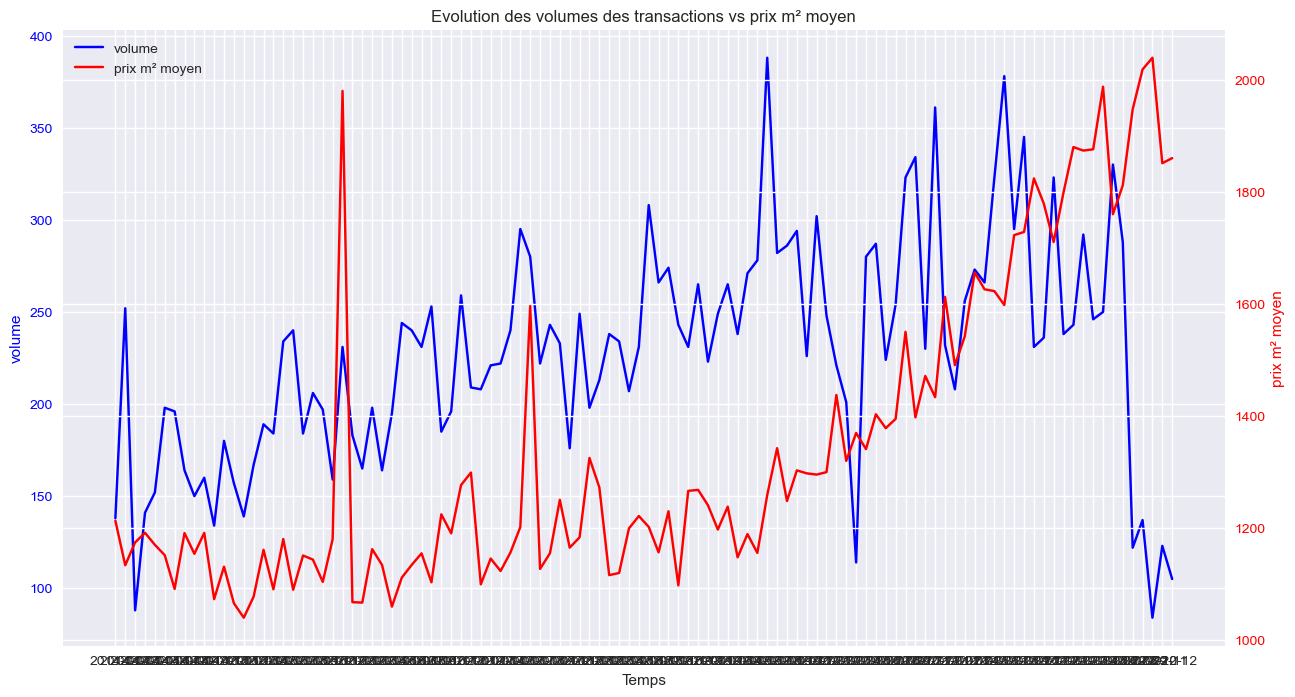

In [20]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(volume, color='b', label='volume')
ax1.set_xlabel('Temps')
ax1.set_ylabel('volume', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(resultat, color='r', label='prix m² moyen')
ax2.set_ylabel('prix m² moyen', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Evolution des volumes des transactions vs prix m² moyen')

plt.show()

In [21]:
import pandas as pd

#pour lisser les graphs
#resultat['prix_m2_smooth'] = resultat['prix_m2'].rolling(window=2).mean()
#volume['Volume de transaction/mois_smooth'] = volume['Volume de transaction/mois'].rolling(window=2).mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])

#fig.add_trace(go.Scatter(x=resultat.index, y=resultat['prix_m2'], mode='lines', name='Prix lissé', line=dict(color='light green')), secondary_y=False)
fig.add_trace(go.Scatter(x=resultat.index, y=resultat['prix_m2'], mode='lines', name='Prix lissé', line=dict(color='light green'), connectgaps=True), secondary_y=False)

#fig.add_trace(go.Scatter(x=volume.index, y=volume['Volume de transaction/semaine'], mode='lines', name='Volume de transaction lissé', line=dict(color='pink')), secondary_y=True)
fig.add_trace(go.Scatter(x=volume.index, y=volume['Volume de transaction/mois'], mode='lines', name='Volume de transaction lissé', line=dict(color='pink'), connectgaps=True), secondary_y=True)

fig.update_layout(
    title='Graphique des volumes de transactions et prix m² moyen',
    xaxis=dict(title='Temps'),
    legend=dict(x=0, y=1),
    showlegend=True,
    autosize=True,
    width=1100,  # Largeur de la figure en pixels
    height=600,  # Hauteur de la figure en pixels
    plot_bgcolor='light blue',  # Couleur de fond transparente
    paper_bgcolor='white',  # Couleur du papier transparente
    font=dict(color='black')
)

fig.show()


In [14]:
#relation inverse entre le volume des transactions et le prix moy du m2
#On remarque une saisonalité, les prix baissent entre février et Mai, le volume de transaction explose en Juillet

In [23]:
resultat["variation"]=(resultat["prix_m2"]-resultat["prix_m2"].shift())/resultat["prix_m2"].shift()

In [24]:
volume["variation"]=(volume["Volume de transaction/mois"]-volume["Volume de transaction/mois"].shift())/volume["Volume de transaction/mois"].shift()

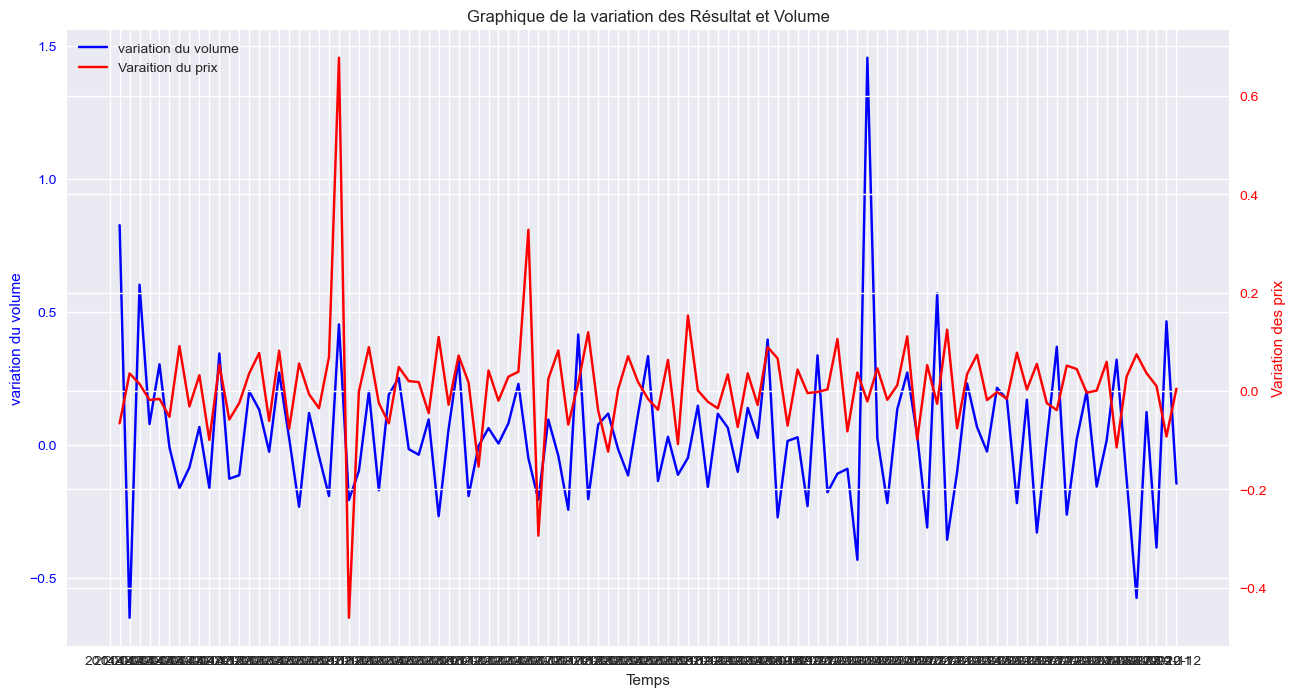

In [25]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(volume.variation, color='b', label='variation du volume')
ax1.set_xlabel('Temps')
ax1.set_ylabel('variation du volume', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(resultat.variation, color='r', label='Varaition du prix')
ax2.set_ylabel('Variation des prix', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Graphique de la variation des Résultat et Volume')

plt.show()



In [26]:
resultat["sma_4"]=resultat["prix_m2"].rolling(4).mean()
resultat["sma_12"]=resultat["prix_m2"].rolling(12).mean()
resultat["position"]=np.where(resultat["sma_4"]>resultat["sma_12"],1,-1)


In [27]:
volume["sma_4"]=volume["Volume de transaction/mois"].rolling(4).mean()
volume["sma_12"]=volume["Volume de transaction/mois"].rolling(12).mean()
volume["position"]=np.where(volume["sma_4"]>resultat["sma_12"],1,-1)

In [26]:
resultat.dropna()

prix_m2  variation         sma_4        sma_12  position
annee_mois                                                               
2014-12      8095.650313   0.026677   8103.873317   8179.826653        -1
2015-01      8081.053843  -0.001803   8098.249385   8170.257282        -1
2015-02      8053.212248  -0.003445   8028.803415   8162.053046        -1
2015-03      8004.599015  -0.006037   8058.628855   8158.568084        -1
2015-04      8049.851591   0.005653   8047.179174   8144.702455        -1
...                  ...        ...           ...           ...       ...
2022-08     10833.731111  -0.018082  10922.936270  10883.469380         1
2022-09     11237.484296   0.037268  11015.009221  10896.047756         1
2022-10     10822.930137  -0.036890  10981.844820  10906.405046         1
2022-11     10810.434818  -0.001155  10926.145090  10900.244399         1
2022-12     10714.625984  -0.008863  10896.368809  10895.799822         1

[97 rows x 5 columns]

In [27]:
volume.dropna()

Volume de transaction/mois  variation    sma_4       sma_12  \
annee_mois                                                                
2014-12                           2406   0.526650  2049.00  2209.750000   
2015-01                           1913  -0.204904  2015.50  2206.833333   
2015-02                           1886  -0.014114  1945.25  2168.666667   
2015-03                           2453   0.300636  2164.50  2200.833333   
2015-04                           2189  -0.107623  2110.25  2208.500000   
...                                ...        ...      ...          ...   
2022-08                           1838  -0.523958  3095.00  2901.583333   
2022-09                           3884   1.113166  3308.75  2937.333333   
2022-10                           2783  -0.283471  3091.50  2925.250000   
2022-11                           2449  -0.120014  2738.50  2938.916667   
2022-12                           2778   0.134341  2973.50  2927.583333   

            position  
annee_mois            
2014-12           -1  
2015-01           -1  
2015-02           -1  
2015-03           -1  
2015-04           -1  
...              ...  
2022-08           -1  
2022-09           -1  
2022-10           -1  
2022-11           -1  
2022-12           -1  

[97 rows x 5 columns]

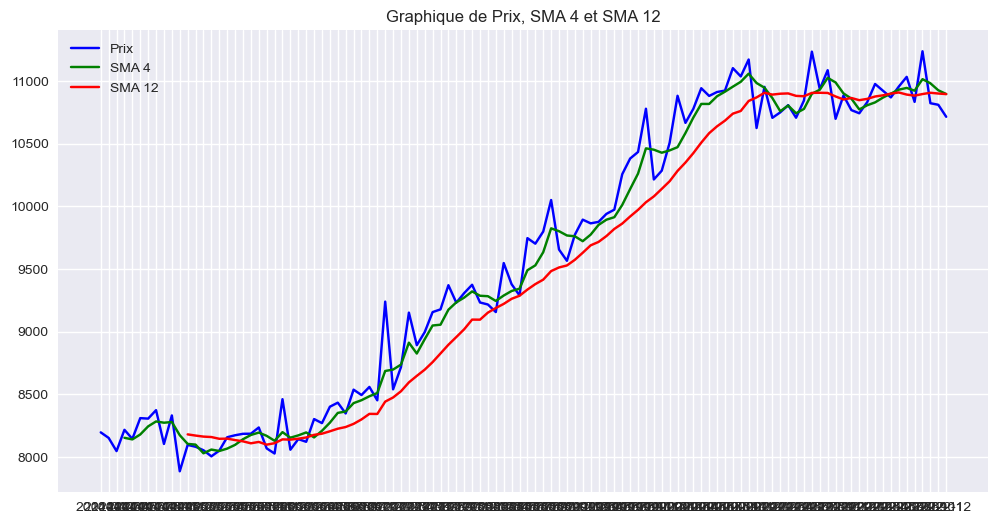

In [28]:

plt.figure(figsize=(12, 6))

plt.plot(resultat["prix_m2"], label='Prix', color='blue')

plt.plot(resultat.sma_4, label='SMA 4', color='green')

plt.plot(resultat.sma_12, label='SMA 12', color='red')

plt.legend()

plt.title('Graphique de Prix, SMA 4 et SMA 12')

plt.show()


In [29]:

# Supposons que 'resultat' soit un DataFrame pandas contenant vos données

# Créer une figure
fig = go.Figure()

# Ajouter une trace pour le prix
fig.add_trace(go.Scatter(x=resultat.index, y=resultat["prix_m2"], mode='lines', name='Prix', line=dict(color='light green')))

# Ajouter une trace pour SMA 7
fig.add_trace(go.Scatter(x=resultat.index, y=resultat["sma_4"], mode='lines', name='prix m² / 4m', line=dict(color='yellow')))

# Ajouter une trace pour SMA 20
fig.add_trace(go.Scatter(x=resultat.index, y=resultat["sma_12"], mode='lines', name='prix m²/12m', line=dict(color='light blue')))

# Personnaliser la mise en page du graphique
fig.update_layout(
    title='Graphique de Prix, prix m²/4m et prix m²/12m',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Valeur'),
    legend=dict(x=0, y=1),
    showlegend=True,
    autosize=True,
    width=1000,  # Largeur de la figure en pixels
    height=600,   # Hauteur de la figure en pixels
    plot_bgcolor='light blue',
    paper_bgcolor='white',
    font=dict(color='black')
)

# Afficher le graphique
fig.show()


In [30]:


# Supposons que 'resultat' soit un DataFrame pandas contenant vos données

# Créer une figure
fig = go.Figure()

# Ajouter une trace pour le prix
fig.add_trace(go.Scatter(x=volume.index, y=volume["Volume de transaction/mois"], mode='lines', name='volume des transactions', line=dict(color='light green')))

# Ajouter une trace pour SMA 7
fig.add_trace(go.Scatter(x=volume.index, y=volume["sma_4"], mode='lines', name='volume moy /4m', line=dict(color='yellow')))

# Ajouter une trace pour SMA 20
fig.add_trace(go.Scatter(x=volume.index, y=volume["sma_12"], mode='lines', name='volume moy/12m', line=dict(color='light blue')))

# Personnaliser la mise en page du graphique
fig.update_layout(
    title='Graphique de Volume de transaction, volume moy/4m et volume moy/12m',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Valeur'),
    legend=dict(x=0, y=1),
    showlegend=True,
    autosize=True,
    width=1000,  # Largeur de la figure en pixels
    height=600,   # Hauteur de la figure en pixels
    plot_bgcolor='light blue',
    paper_bgcolor='white',
    font=dict(color='black')
)

# Afficher le graphique
fig.show()

In [31]:
volume.dropna()

Volume de transaction/mois  variation    sma_4       sma_12  \
annee_mois                                                                
2014-12                           2406   0.526650  2049.00  2209.750000   
2015-01                           1913  -0.204904  2015.50  2206.833333   
2015-02                           1886  -0.014114  1945.25  2168.666667   
2015-03                           2453   0.300636  2164.50  2200.833333   
2015-04                           2189  -0.107623  2110.25  2208.500000   
...                                ...        ...      ...          ...   
2022-08                           1838  -0.523958  3095.00  2901.583333   
2022-09                           3884   1.113166  3308.75  2937.333333   
2022-10                           2783  -0.283471  3091.50  2925.250000   
2022-11                           2449  -0.120014  2738.50  2938.916667   
2022-12                           2778   0.134341  2973.50  2927.583333   

            position  
annee_mois            
2014-12           -1  
2015-01           -1  
2015-02           -1  
2015-03           -1  
2015-04           -1  
...              ...  
2022-08           -1  
2022-09           -1  
2022-10           -1  
2022-11           -1  
2022-12           -1  

[97 rows x 5 columns]

In [32]:
colonnes_selectionnees = ['surface_habitable', 'n_pieces','prix_m2_x']
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

departement[colonnes_selectionnees].describe()


surface_habitable      n_pieces      prix_m2_x
count      285747.000000 285747.000000  285747.000000
mean           54.363374      2.418482    9615.629686
std            41.735077      1.321889    7016.167323
min             1.000000      0.000000       0.000000
25%            28.000000      1.000000    7666.666667
50%            43.000000      2.000000    9389.819672
75%            68.000000      3.000000   11250.000000
max          1561.000000     45.000000 1363888.888889

<Axes: xlabel='surface_habitable', ylabel='Count'>

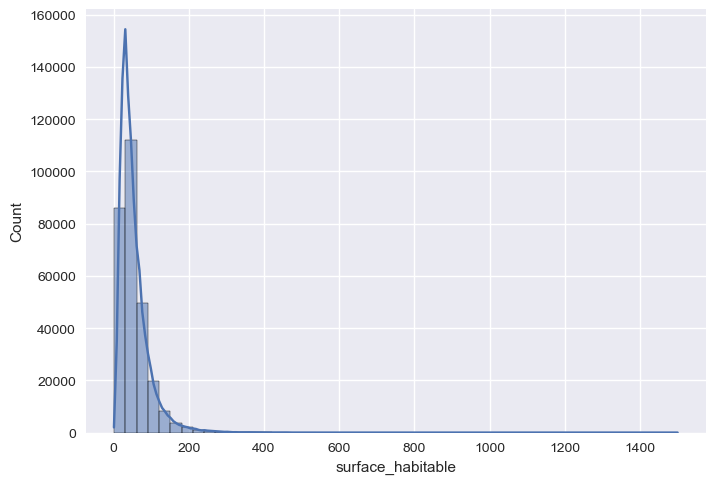

In [54]:
sns.histplot(x=departement.loc[departement["type_batiment"] == "Appartement", 'surface_habitable'], kde=True, bins=50)


In [28]:
sns.histplot((x = departement.loc[departement["type_batiment"] = "Maison"]).['surface_habitable'],  kde = True, bins = 50).set_title('surface habitable')


SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (1877233110.py, line 1)

Text(0.5, 1.0, 'Nombre de pièces')

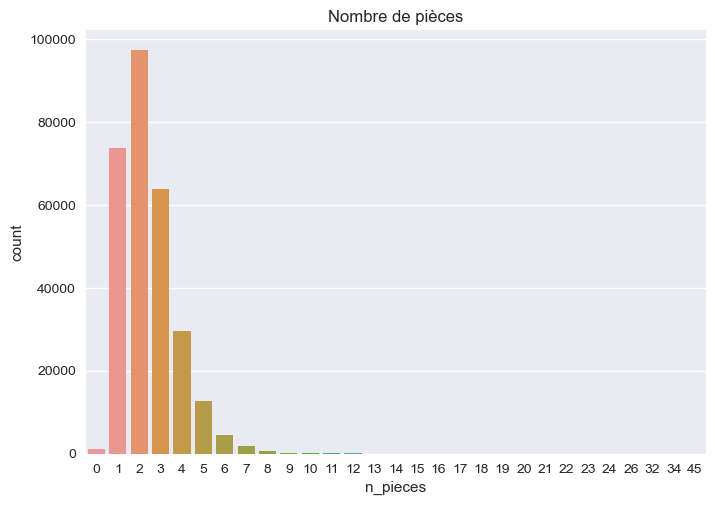

In [36]:
sns.countplot(x = 'n_pieces', data = departement).set_title('Nombre de pièces')


Text(0.5, 1.0, 'Nombre de pièces')

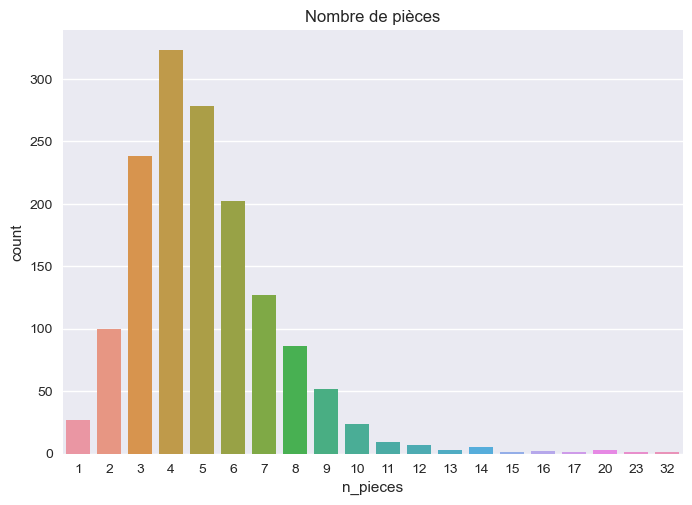

In [37]:
sns.countplot(x = 'n_pieces', data = departement.loc[departement["type_batiment"] == "Maison"]).set_title('Nombre de pièces')


Text(0.5, 1.0, 'Nature du bien')

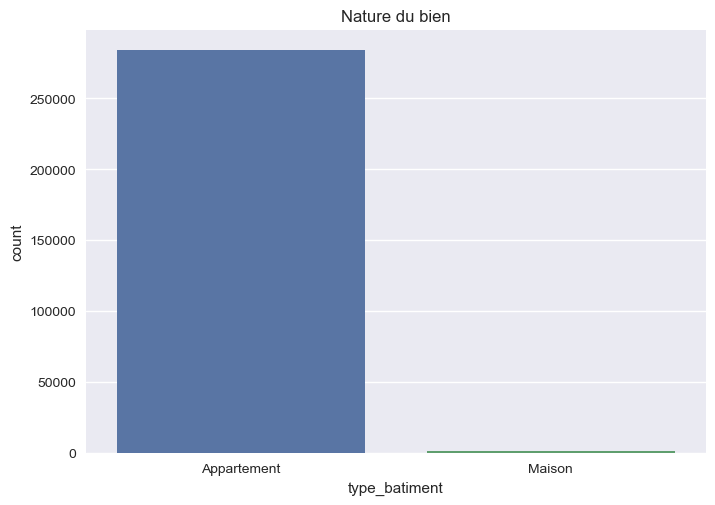

In [38]:
sns.countplot(x='type_batiment',data=departement).set_title('Nature du bien')


In [41]:
data1 = data[data["departement"]==75]

In [42]:
data1.index=data1["date_transaction"]

In [43]:
data1 = data1.drop(["surface_dependances","surface_locaux_industriels","surface_terrains_agricoles","surface_terrains_sols","surface_terrains_nature"],axis=1)



In [44]:
appartement = departement[departement["type_batiment"] == "Appartement"]


In [45]:
appartement['date_transaction'] = pd.to_datetime(appartement['date_transaction'])
appartement['annee_mois'] = appartement['date_transaction'].dt.strftime('%Y-%m')
volume_appartement = departement.groupby('annee_mois').size().reset_index(name='Volume de transaction/mois')
departement = pd.merge(departement, volume_appartement, on='annee_mois', how='right')

C:\Users\Kamir\AppData\Local\Temp\ipykernel_19652\283319388.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kamir\AppData\Local\Temp\ipykernel_19652\283319388.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='surface_totale', ylabel='prix'>

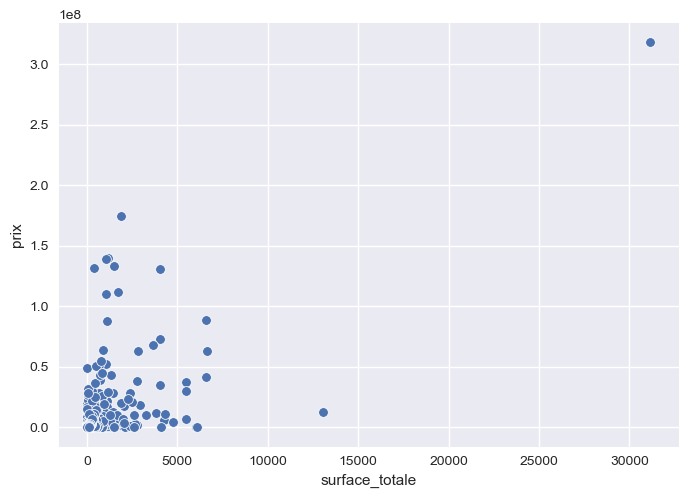

In [47]:
sns.scatterplot(x = 'surface_totale', y = 'prix', data = appartement)


<Axes: xlabel='surface_totale', ylabel='prix'>

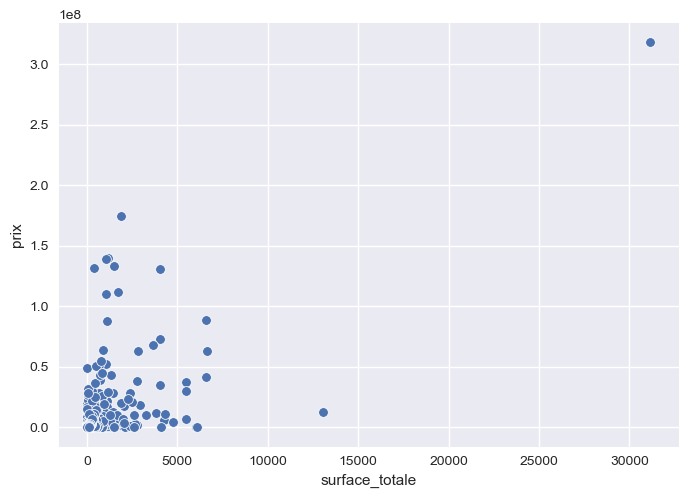

In [48]:
sns.scatterplot(x = 'surface_totale', y = 'prix', data = departement.loc[departement["type_batiment"] == "Appartement"])


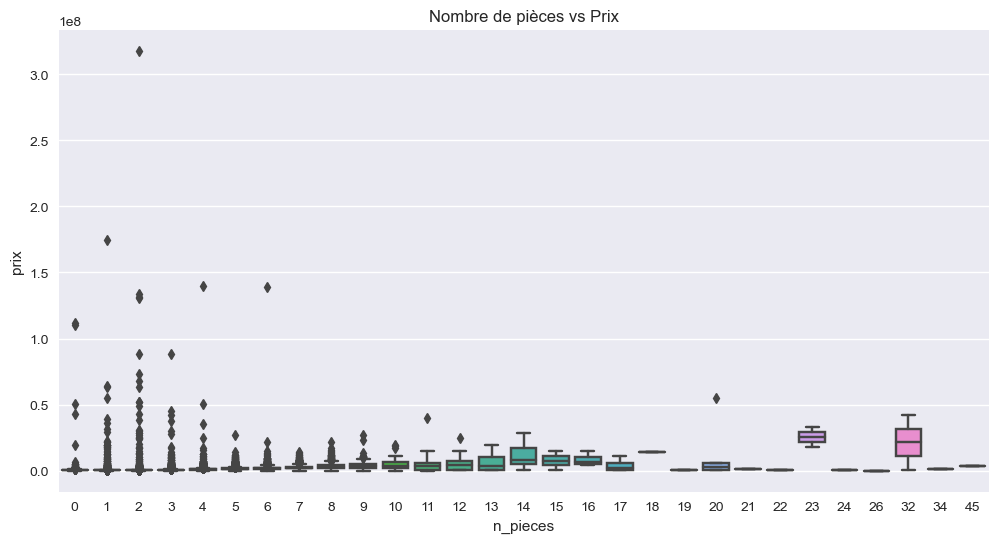

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créez la boîte à moustaches (boxplot)
plt.figure(figsize=(12, 6))  # Définissez la taille de la figure
sns.boxplot(x='n_pieces', y='prix', data=departement)
plt.title('Nombre de pièces vs Prix')

# Affichez le graphe
plt.show()


In [56]:
import plotly.express as px

# Supposons que vous ayez un DataFrame appelé 'data' avec les colonnes 'ville', 'ventes' et des données géographiques
# Assurez-vous d'avoir les données géographiques appropriées, par exemple les coordonnées géographiques des villes.

fig = px.scatter_geo(departement, 
                     locations="Ville", 
                     color="Volume de transaction/mois",
                     size="Volume de transaction/mois",
                     projection="natural earth",
                     title="Nombre de ventes de maisons par ville en France",
                     template="plotly",
                     color_continuous_scale="Viridis"
                    )

fig.update_geos(showcoastlines=True, coastlinecolor="black", showland=True, landcolor="lightgray")

fig.show()


ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'id_transaction', 'date_transaction', 'prix', 'departement', 'id_ville', 'ville', 'code_postal', 'adresse', 'type_batiment', 'vefa', 'n_pieces', 'surface_habitable', 'id_parcelle_cadastre', 'latitude', 'longitude', 'surface_dependances', 'surface_locaux_industriels', 'surface_terrains_agricoles', 'surface_terrains_sols', 'surface_terrains_nature', 'surface_totale', 'prix_m2_x', 'annee_mois', 'Volume de transaction/mois_x', 'moy prix m²/mois', 'Volume de transaction/mois_y'] but received: Volume de transaction/mois